In [36]:
import pandas as pd
import numpy as np

In [76]:
index = pd.read_excel("normal.xlsx", engine = 'openpyxl')

In [77]:
index.head()


,Unnamed: 0,시도코드,시도명칭,시군구코드,시군구명칭2,확진자수,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,방법2 지수
0,0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.654550
1,1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.059300
2,2,11,서울특별시,11030,용산구,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,7.755940
3,3,11,서울특별시,11040,성동구,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,8.020420
4,4,11,서울특별시,11050,광진구,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,7.946505


In [78]:
index.iloc[0,]

Unnamed: 0                   0
시도코드                        11
시도명칭                     서울특별시
시군구코드                    11010
시군구명칭2                     종로구
확진자수                  0.561973
시가지면적 대비 방문객 수 정규화    0.535179
전체 식당대비 안심식당 수 정규화    0.072467
교통안전성                 0.154472
숙박안전성                  0.27853
자연관광지 정규화             0.246234
방법2 지수                 7.65455
Name: 0, dtype: object

In [79]:
index = index.drop(columns = 'Unnamed: 0')

index.rename(columns = {'확진자수':'corona_i', '시가지면적 대비 방문객 수 정규화':'visitors_i',
                         '전체 식당대비 안심식당 수 정규화':'rest_i', '교통안전성':'trans_i', '숙박안전성':'accom_i',
                        '자연관광지 정규화':'outdoor_i', '방법2 지수':'index'}, inplace = True)

In [80]:
index.head()

,시도코드,시도명칭,시군구코드,시군구명칭2,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i,index
0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,7.654550
1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,7.059300
2,11,서울특별시,11030,용산구,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,7.755940
3,11,서울특별시,11040,성동구,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,8.020420
4,11,서울특별시,11050,광진구,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,7.946505


In [83]:
index_sta = index.iloc[:, 4:10]

In [82]:
index_sta.head()

,corona_i,visitors_i,rest_i,trans_i,accom_i,outdoor_i
0,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234
1,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000
2,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000
3,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000
4,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000


In [85]:
import seaborn

<AxesSubplot:xlabel='corona_i', ylabel='visitors_i'>

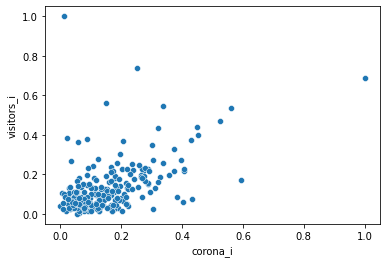

In [87]:
seaborn.scatterplot(x= 'corona_i', y='visitors_i', data = index_sta)

<AxesSubplot:xlabel='rest_i', ylabel='trans_i'>

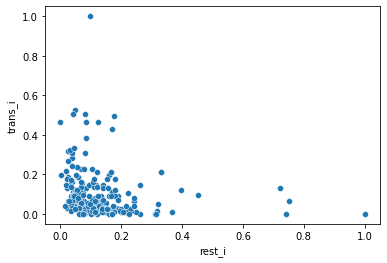

In [88]:
seaborn.scatterplot(x= 'rest_i', y='trans_i', data = index_sta)

<AxesSubplot:xlabel='rest_i', ylabel='accom_i'>

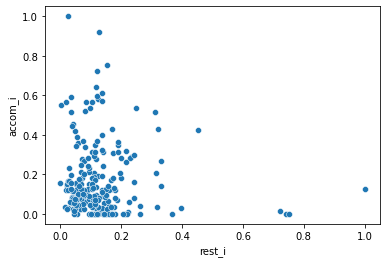

In [89]:
seaborn.scatterplot(x= 'rest_i', y='accom_i', data = index_sta)

<AxesSubplot:xlabel='trans_i', ylabel='accom_i'>

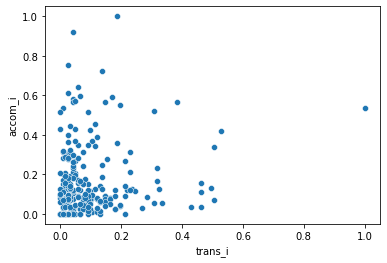

In [90]:
seaborn.scatterplot(x= 'trans_i', y='accom_i', data = index_sta)

<AxesSubplot:xlabel='visitors_i', ylabel='outdoor_i'>

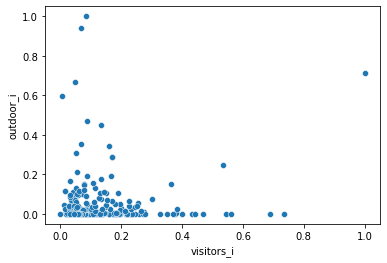

In [91]:
seaborn.scatterplot(x= 'visitors_i', y='outdoor_i', data = index_sta)

In [93]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components = 2)
pca.fit(index_sta)
z = pca.transform(index_sta)
z

array([[ 3.96668751e-01,  3.37606060e-01],
       [ 7.43997472e-01,  7.27219096e-01],
       [ 3.35779317e-01,  3.03094406e-01],
       [ 1.34510636e-01,  3.20138774e-01],
       [ 2.55168477e-01,  2.33997164e-01],
       [ 6.96561312e-02,  2.63258921e-01],
       [-2.93998738e-02,  2.08230359e-01],
       [ 4.10205709e-02,  1.44136355e-01],
       [ 5.18206710e-03,  5.61717386e-03],
       [ 9.50224396e-02,  1.69978004e-02],
       [-4.25599123e-02,  1.51270552e-01],
       [ 2.43756509e-01, -7.88701448e-04],
       [ 6.66716554e-02,  1.89611800e-01],
       [ 3.87342471e-01,  1.95364677e-01],
       [ 3.39152243e-02,  2.14343237e-01],
       [ 3.30088176e-01,  1.77177408e-01],
       [ 6.68927188e-02,  2.42504131e-01],
       [ 1.20355737e-01,  1.10326322e-01],
       [ 2.02096869e-01,  3.34256185e-01],
       [ 7.88766487e-02,  1.95085774e-01],
       [ 6.24316956e-02,  1.83665769e-01],
       [ 5.50716750e-01,  2.95014970e-01],
       [ 9.24966862e-01,  1.89729155e-01],
       [ 3.

In [96]:
pca.fit(index_sta)

PCA(n_components=2)

<AxesSubplot:>

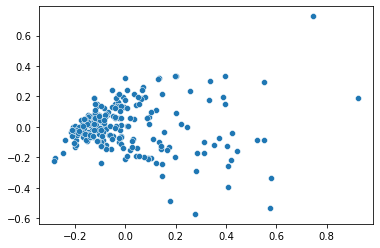

In [97]:
seaborn.scatterplot(
x = z[:, 0],
y = z[:, 1])

In [98]:
pca.components_

array([[ 0.24702036,  0.34983432, -0.11056385,  0.15139098,  0.84810629,
         0.24933715],
       [ 0.61831864,  0.43040503, -0.30606197,  0.23296803, -0.3119167 ,
        -0.43265865]])

In [99]:
pca.explained_variance_ratio_

array([0.3367935 , 0.22239028])

In [100]:
import matplotlib.pyplot as plt

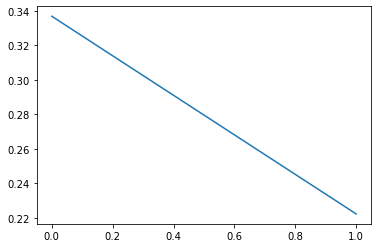

In [102]:
plt.plot(pca.explained_variance_ratio_)